## EDA Analysis on Terrorism
##Import libraries

In [ ]:
import math
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

##Loading and explore the dataset


In [ ]:
import plotly.offline as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [ ]:


df = pd.read_csv('/content/globalterrorismdb_0718dist.csv', encoding='ISO-8859-1')


In [ ]:
# Display the last few rows of the dataset
df.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
173891,201704140016,2017,4,14,NaN,0,NaN,75,Germany,8,...,NaN,"""Two refugee centres targeted by arson attacks...",NaN,NaN,START Primary Collection,-9.0,-9.0,0.0,-9.0,NaN
173892,201704140017,2017,4,14,NaN,0,NaN,153,Pakistan,6,...,NaN,"""Afghan Taliban leader shot dead by IS in Pesh...","""BBCM Terrorism Digest: 22-23 April 2017,"" BBC...",NaN,START Primary Collection,0.0,1.0,1.0,1.0,NaN
173893,201704140018,2017,4,14,NaN,0,NaN,95,Iraq,10,...,Casualty numbers conflict across sources. Foll...,"""Baghdad market blast leaves 2 dead, 4 injured...","""One killed, five wounded in bomb blast south ...",NaN,START Primary Collection,-9.0,-9.0,0.0,-9.0,NaN
173894,201704140019,2017,4,14,NaN,0,NaN,95,Iraq,10,...,NaN,"""Iraq: Security Roundup 1900 GMT 14 April 2017...",NaN,NaN,START Primary Collection,-9.0,-9.0,0.0,-9.0,NaN
173895,201704140020,2017,4,14,2017-04-14 00:00:00,0,NaN,95,Iraq,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [ ]:
#Renaming the columns

df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [ ]:
#As there are too many columns in dataset, we are taking only important columns from the dataset for data preprocessing

df = df[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed',
               'Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [ ]:
#Cheching the null values

df.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
state             421
Region              0
city              434
latitude         4530
longitude        4531
AttackType          0
Killed           9895
Wounded         15624
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         1
Motive         124700
dtype: int64

In [ ]:
df.shape

(173896, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173896 entries, 0 to 173895
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         173896 non-null  int64  
 1   Month        173896 non-null  int64  
 2   Day          173896 non-null  int64  
 3   Country      173896 non-null  object 
 4   state        173475 non-null  object 
 5   Region       173896 non-null  object 
 6   city         173462 non-null  object 
 7   latitude     169366 non-null  float64
 8   longitude    169365 non-null  float64
 9   AttackType   173896 non-null  object 
 10  Killed       164001 non-null  float64
 11  Wounded      158272 non-null  float64
 12  Target       173260 non-null  object 
 13  Summary      107767 non-null  object 
 14  Group        173896 non-null  object 
 15  Target_type  173896 non-null  object 
 16  Weapon_type  173895 non-null  object 
 17  Motive       49196 non-null   object 
dtypes: float64(4), int64(3),

In [ ]:
df.describe

<bound method NDFrame.describe of         Year  Month  Day             Country               state  \
0       1970      7    2  Dominican Republic                 NaN   
1       1970      0    0              Mexico             Federal   
2       1970      1    0         Philippines              Tarlac   
3       1970      1    0              Greece              Attica   
4       1970      1    0               Japan             Fukouka   
...      ...    ...  ...                 ...                 ...   
173891  2017      4   14             Germany         Brandenburg   
173892  2017      4   14            Pakistan  Khyber Pakhtunkhwa   
173893  2017      4   14                Iraq             Baghdad   
173894  2017      4   14                Iraq               Basra   
173895  2017      4   14                Iraq             Baghdad   

                             Region           city   latitude   longitude  \
0       Central America & Caribbean  Santo Domingo  18.456792  -69.95116

In [ ]:
df['Year'].value_counts(dropna = False).sort_index()

1970      651
1971      471
1972      568
1973      473
1974      581
1975      740
1976      923
1977     1319
1978     1526
1979     2662
1980     2662
1981     2586
1982     2544
1983     2870
1984     3495
1985     2915
1986     2860
1987     3183
1988     3721
1989     4324
1990     3887
1991     4683
1992     5071
1994     3456
1995     3081
1996     3058
1997     3197
1998      934
1999     1395
2000     1814
2001     1906
2002     1333
2003     1278
2004     1166
2005     2017
2006     2758
2007     3242
2008     4805
2009     4721
2010     4826
2011     5076
2012     8522
2013    12036
2014    16903
2015    14965
2016    13587
2017     3105
Name: Year, dtype: int64

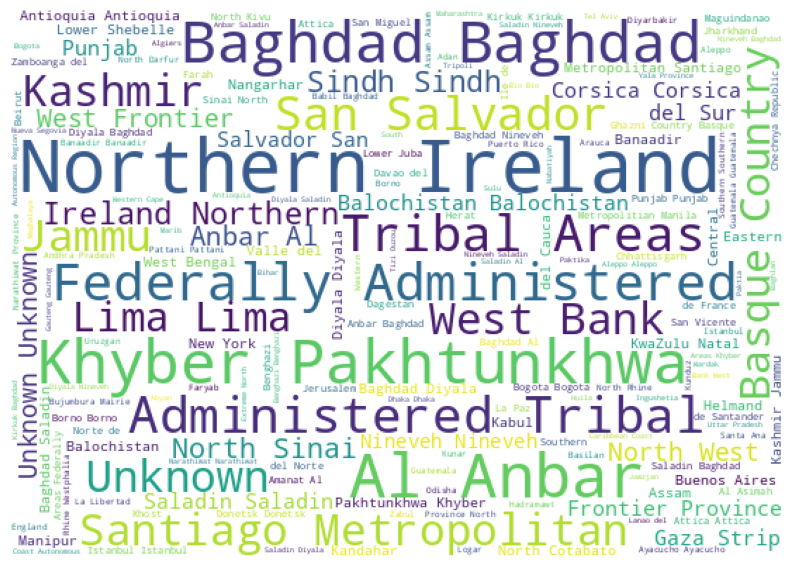

In [ ]:
from wordcloud import WordCloud
from scipy import signal
cities = df.state.dropna()
plt.subplots(figsize=(10,10))
wordclod = WordCloud(background_color = 'white',
                     width = 551,
                     height = 390).generate(' '.join(cities))
plt.axis('off')
plt.imshow(wordclod)
plt.show()

##Data visualization
people killed and wounded in each year

In [ ]:
bi=df[["Year","Wounded"]].groupby("Year").sum()
bi.head()

,Wounded
Year,
1970,212.0
1971,82.0
1972,409.0
1973,495.0
1974,865.0


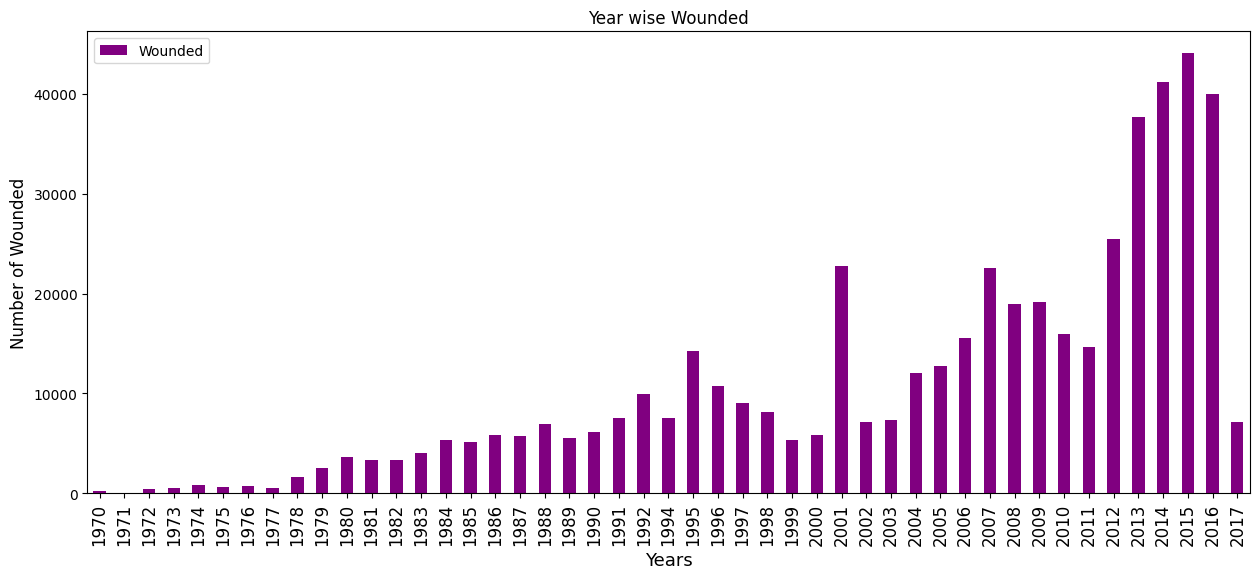

In [ ]:
bi.plot(kind="bar",color="purple",figsize=(15,6))
plt.title("Year wise Wounded",fontsize=12)
plt.xlabel("Years",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Wounded",fontsize=12)
plt.show()

In [ ]:
k=df[["Year","Killed"]].groupby("Year").sum()
k.head()

,Killed
Year,
1970,174.0
1971,173.0
1972,566.0
1973,370.0
1974,539.0


In [ ]:
wi=df[["Year","Wounded"]].groupby("Year").sum()
wi.head()

,Wounded
Year,
1970,212.0
1971,82.0
1972,409.0
1973,495.0
1974,865.0


Text(0, 0.5, 'Number of People Wounded')

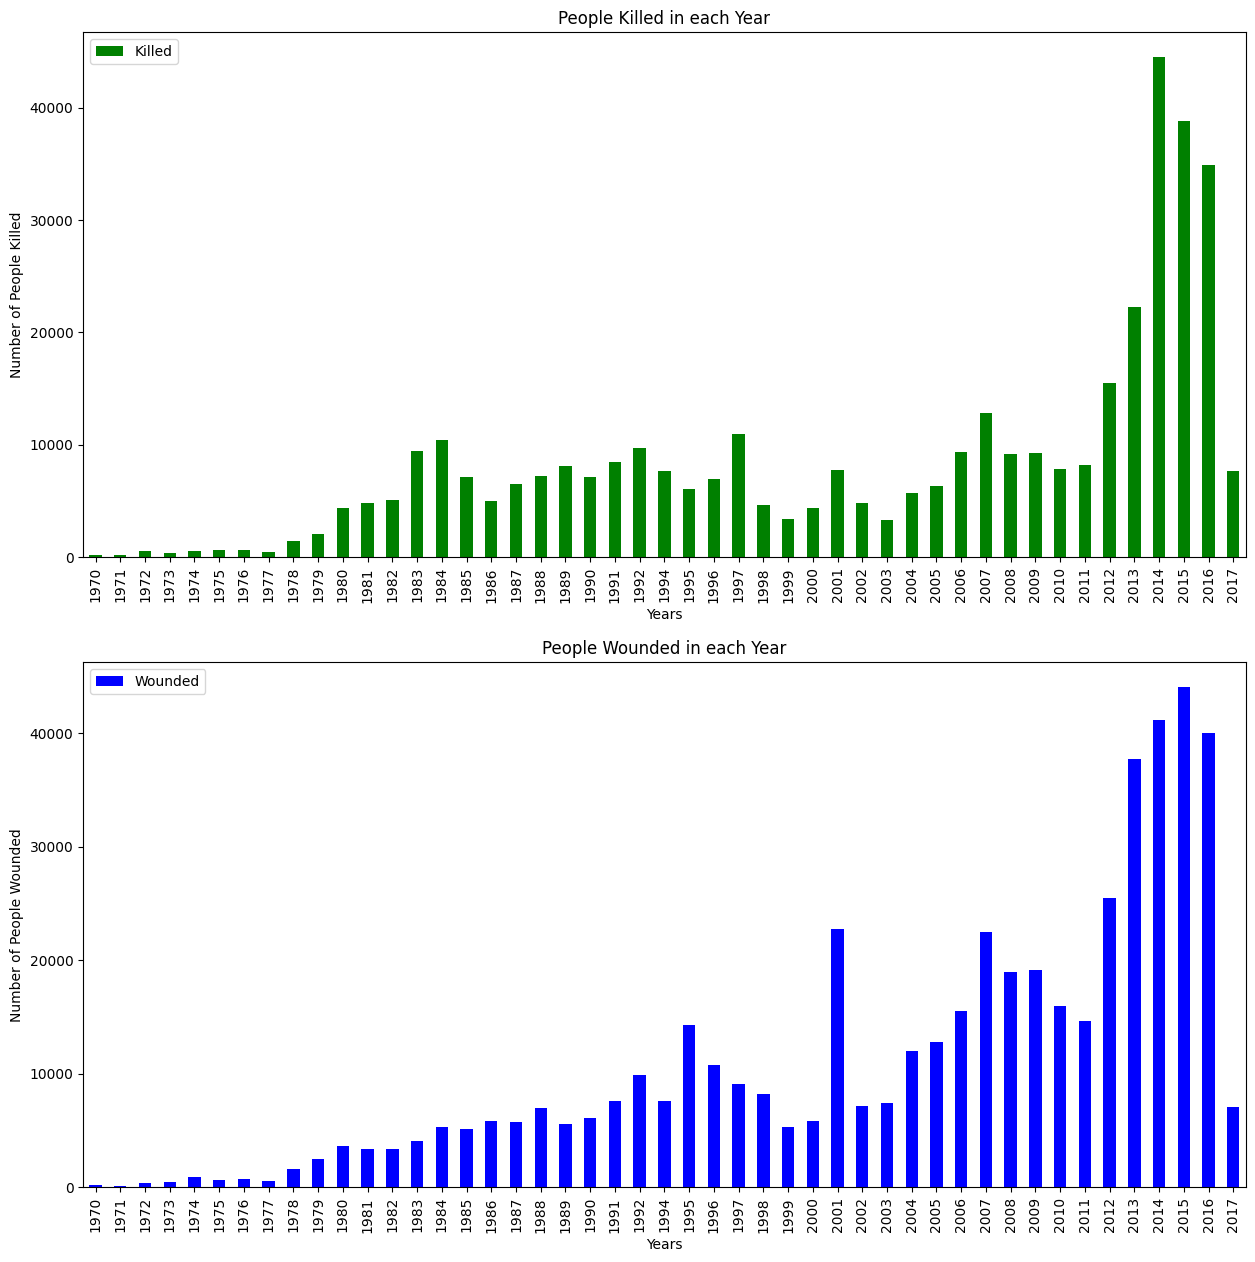

In [ ]:
fig=plt.figure()
ax0=fig.add_subplot(2,1,1)
ax1=fig.add_subplot(2,1,2)

#Killed
k.plot(kind="bar",color="green",figsize=(15,15),ax=ax0)
ax0.set_title("People Killed in each Year")
ax0.set_xlabel("Years")
ax0.set_ylabel("Number of People Killed")

#Wounded
wi.plot(kind="bar",color="blue",figsize=(15,15),ax=ax1)
ax1.set_title("People Wounded in each Year")
ax1.set_xlabel("Years")
ax1.set_ylabel("Number of People Wounded")

##Number of Terrorist Activities each Year

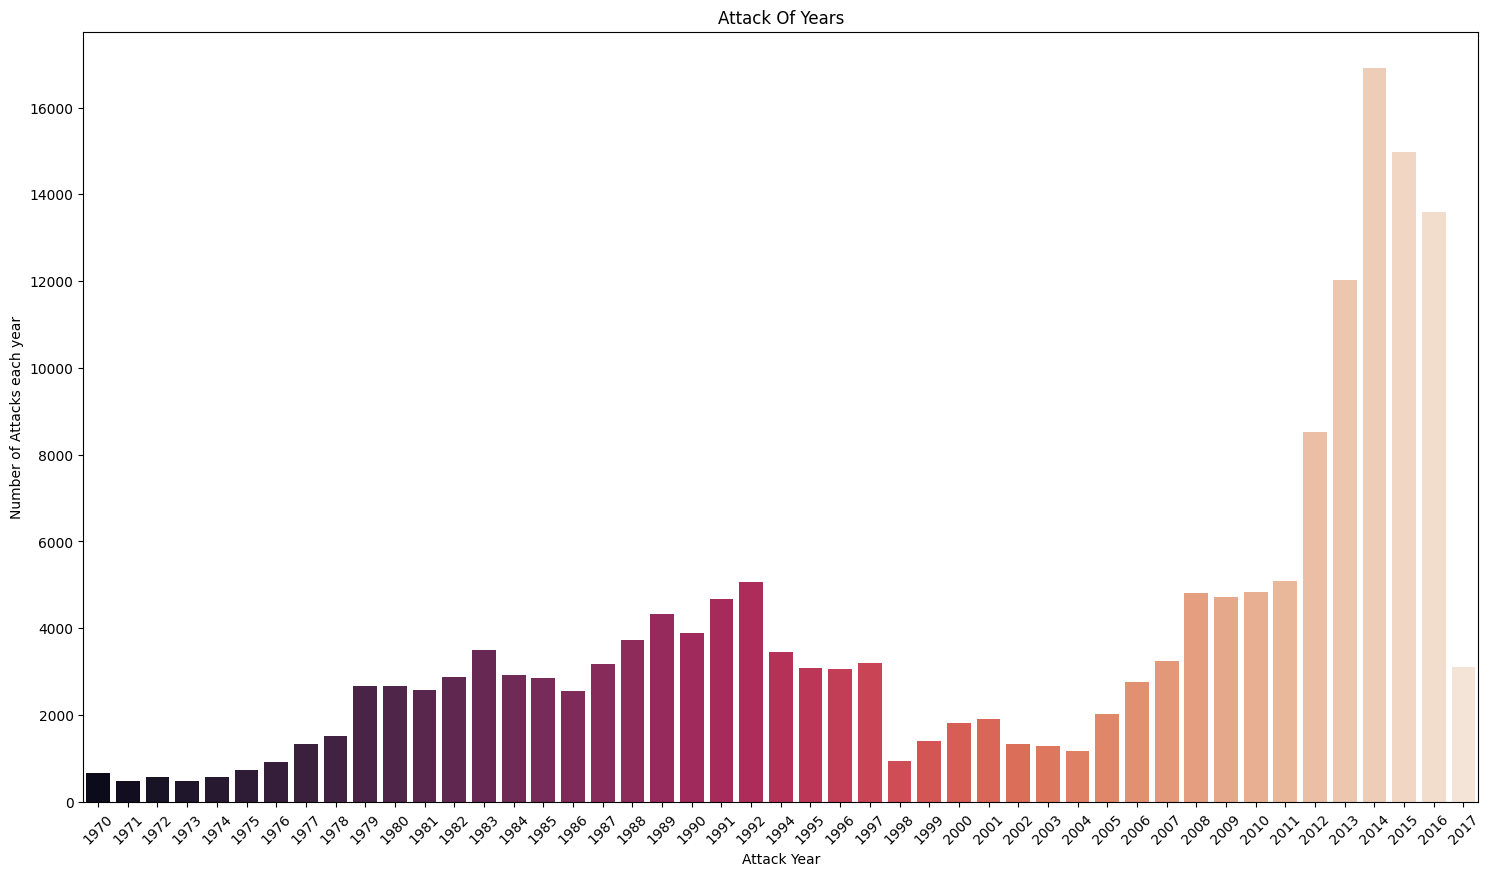

In [ ]:
x_year = df['Year'].unique()
y_count_years = df['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (18,10))
sns.barplot(x = x_year,
           y = y_count_years,
           palette = 'rocket')
plt.xticks(rotation = 45)
plt.xlabel('Attack Year')
plt.ylabel('Number of Attacks each year')
plt.title('Attack Of Years')
plt.show()

Text(0.5, 1.0, 'Number Of Terrorist Activities Each Year')

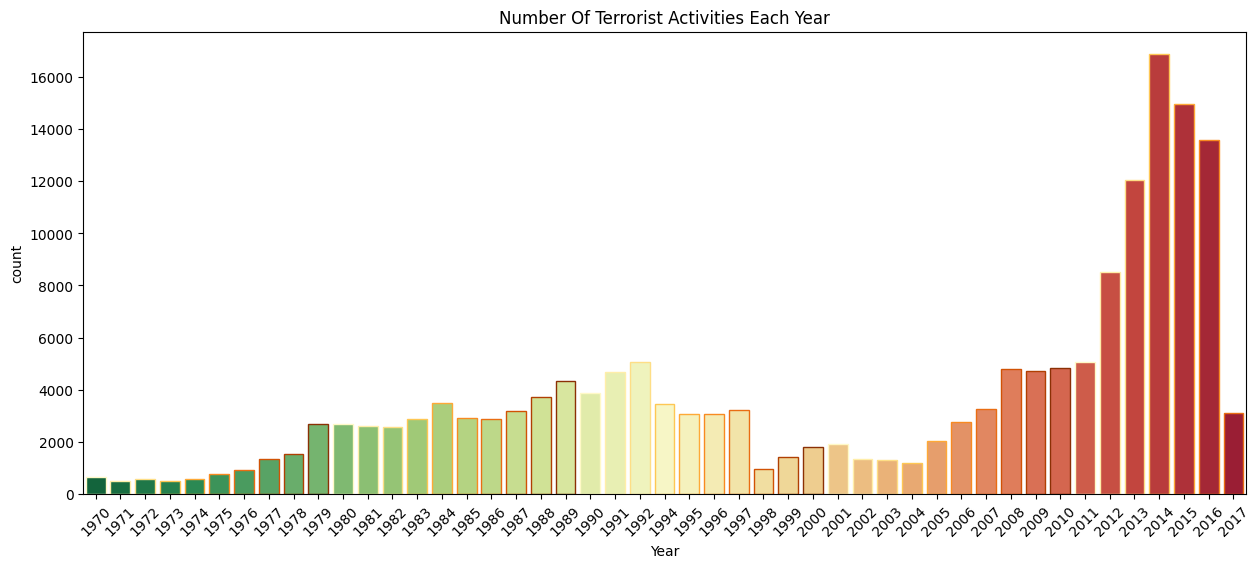

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.subplots(figsize=(15, 6))
sns.countplot(x='Year', data=df, palette='RdYlGn_r', edgecolor=sns.color_palette("YlOrBr", 10))
plt.xticks(rotation=45)
plt.title('Number Of Terrorist Activities Each Year')

##Terrorist Activities by Region in each Year through Area Plot

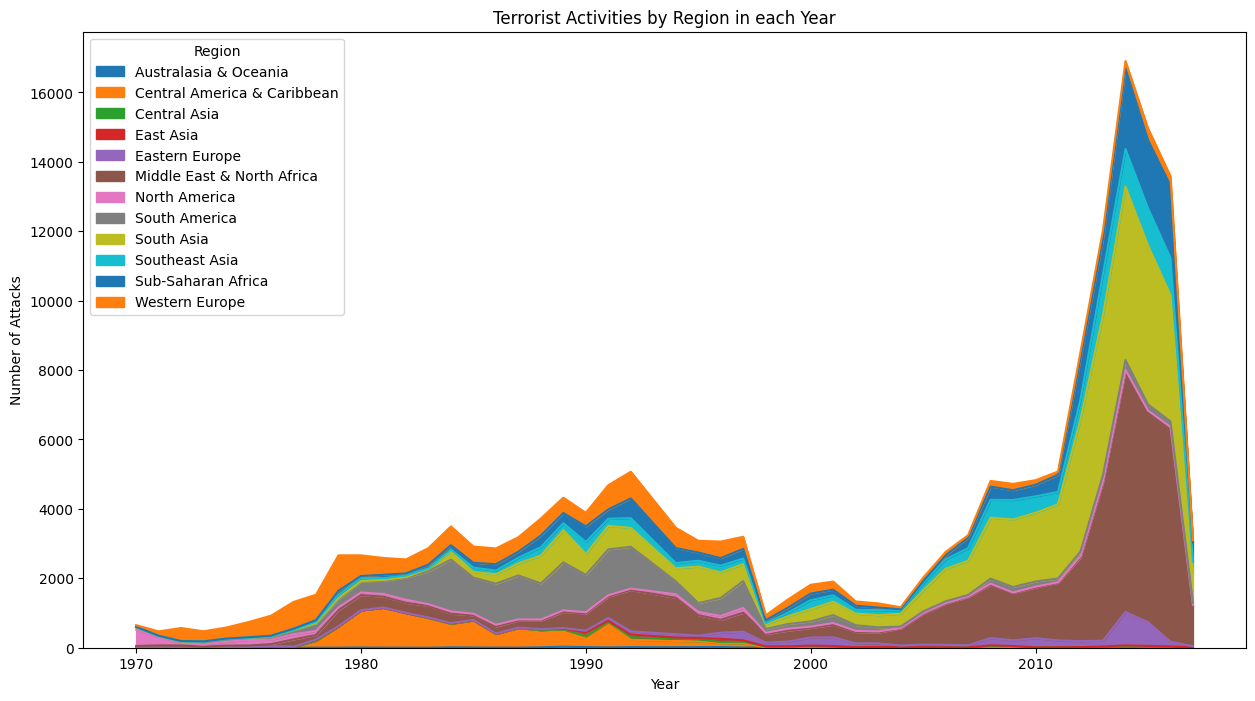

In [ ]:
pd.crosstab(df.Year, df.Region).plot(kind='area',figsize=(15,8))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

In [ ]:
df['Wounded'] = df['Wounded'].fillna(0).astype(int)
df['Killed'] = df['Killed'].fillna(0).astype(int)
df['casualities'] = df['Killed'] + df['Wounded']

##Heatmap

In [ ]:
t = df.sort_values(by='casualities',ascending=False)[:40]
heat=t.pivot_table(index='Country',columns='Year',values='casualities')
heat.fillna(0,inplace=True)
heat.head()

Year,1982,1984,1987,1992,1994,1995,1996,1997,1998,2001,2004,2005,2006,2007,2008,2009,2014,2015,2016
Country,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,536.0,0.0
Chad,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1161.0,0.0,0.0,0.0,0.0
Ethiopia,0.0,0.0,0.0,500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
France,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,520.0
India,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1005.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
colorscale = [[0, '#edf8fb'], [.3, '#00BFFF'],  [.6, '#8856a7'],  [1, '#810f7c']]
heatmap = go.Heatmap(z=heat.values, x=heat.columns, y=heat.index, colorscale=colorscale)
data = [heatmap]
layout = go.Layout(
    title='Top 40 Worst Terror Attacks in History from 1982 to 2016',
    xaxis = dict(ticks='', nticks=20),
    yaxis = dict(ticks='')
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='heatmap',show_link=False)

In [ ]:
reg=pd.crosstab(df.Year,df.Region)
reg.head()

Region,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
Year,,,,,,,,,,,,
1970,1,7,0,2,12,28,472,65,1,10,3,50
1971,1,5,0,1,5,55,247,24,0,6,2,125
1972,8,3,0,0,1,53,73,33,1,16,4,376
1973,1,6,0,2,1,19,64,83,1,2,4,290
1974,1,11,0,4,2,42,111,81,2,3,7,317


In [ ]:
reg1=reg.transpose()
reg1["Total"]=reg1.sum(axis=1)
a=reg1["Total"].sort_values(ascending=False)
a

Region
Middle East & North Africa     47859
South Asia                     42433
South America                  18862
Western Europe                 16431
Sub-Saharan Africa             16115
Southeast Asia                 11768
Central America & Caribbean    10341
Eastern Europe                  5067
North America                   3390
East Asia                        798
Central Asia                     561
Australasia & Oceania            271
Name: Total, dtype: int64

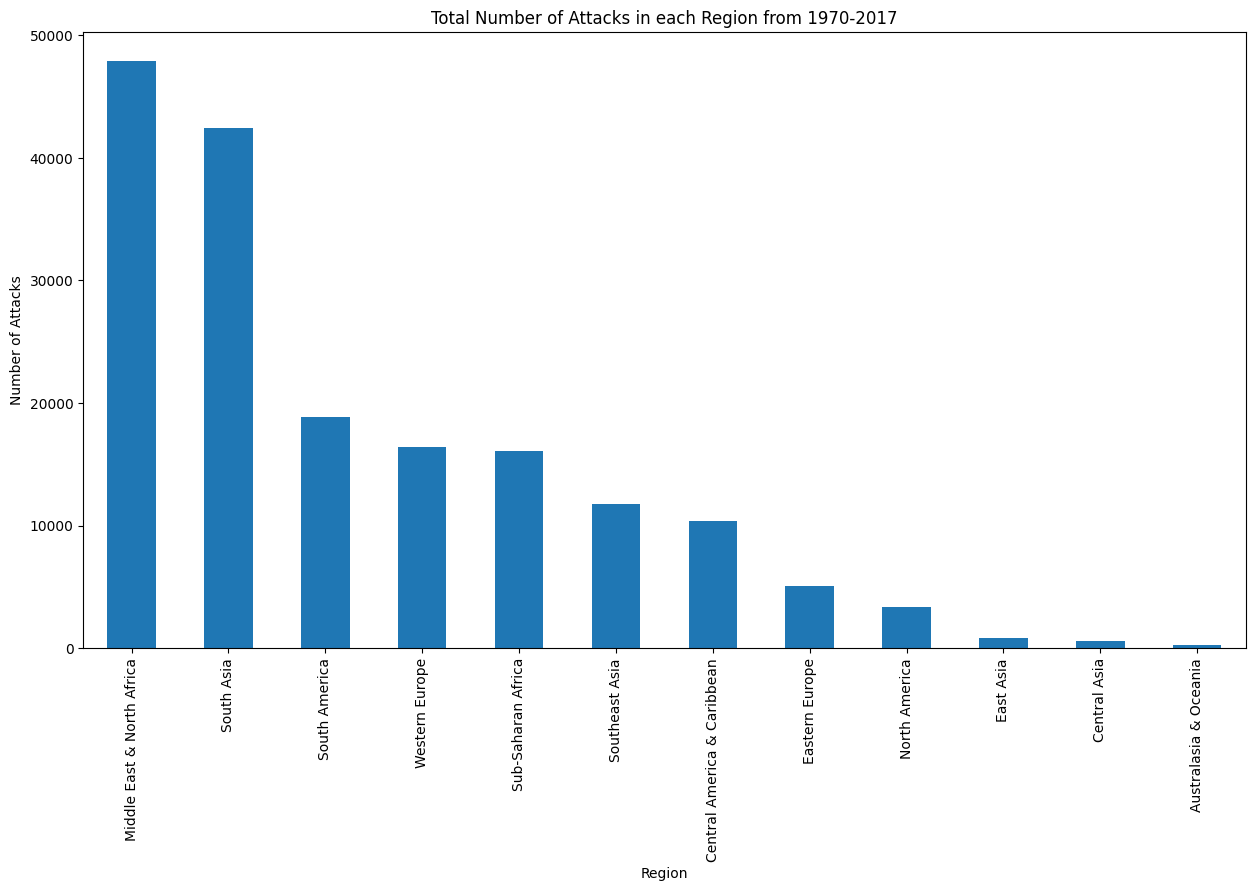

In [ ]:
a.plot(kind="bar",figsize=(15,8))
plt.title("Total Number of Attacks in each Region from 1970-2017")
plt.xlabel("Region")
plt.ylabel("Number of Attacks")
plt.show()

##Top Countries affected by Terror Attacks

In [ ]:
df.Country.value_counts()[:15]

Iraq              22929
Pakistan          13877
Afghanistan       11658
India             11273
Colombia           8227
Philippines        6421
Peru               6093
El Salvador        5320
United Kingdom     5145
Turkey             4141
Thailand           3743
Somalia            3723
Nigeria            3544
Spain              3245
Yemen              3180
Name: Country, dtype: int64

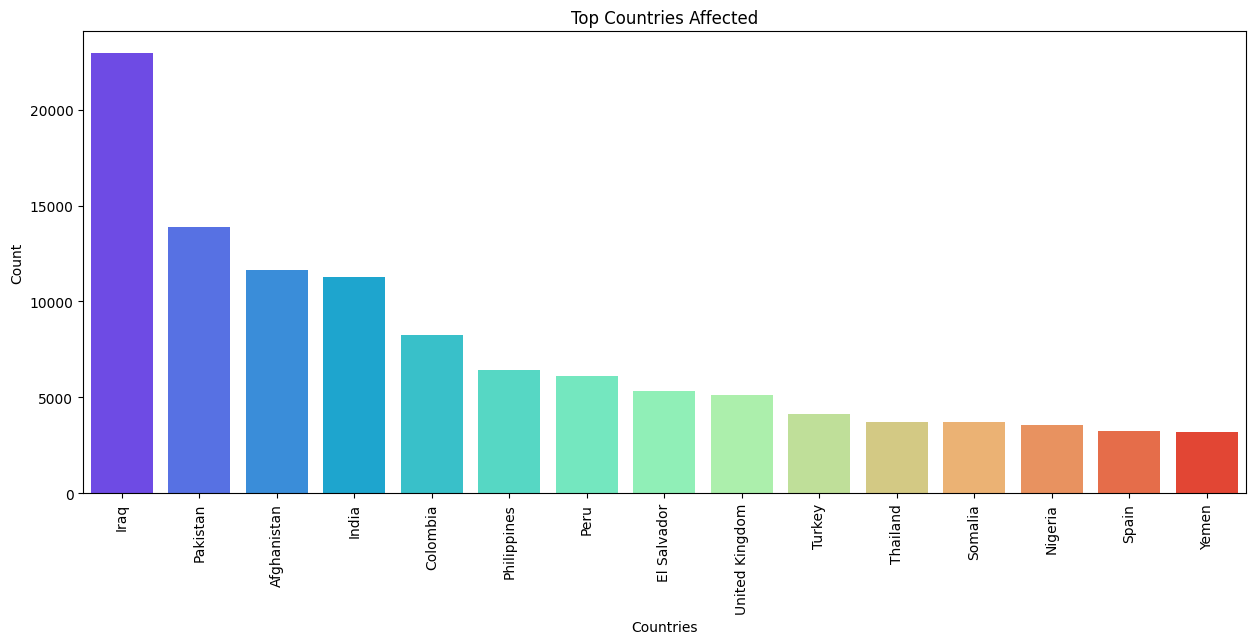

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.subplots(figsize=(15, 6))
top_countries = df['Country'].value_counts()[:15]
sns.barplot(x=top_countries.index, y=top_countries.values,  palette='rainbow')
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()


##Customized Data Analysis


Terrorist Attacks of a Particular year and their Locations

In [ ]:
import folium
from folium.plugins import MarkerCluster
filterYear = df['Year'] == 1974

In [ ]:
filterData = df[filterYear] # filter data
reqFilterData = filterData.loc[:,'city':'longitude'] #We are getting the required fields
reqFilterData = reqFilterData.dropna() # drop NaN values in latitude and longitude
reqFilterDataList = reqFilterData.values.tolist()


In [ ]:
map = folium.Map(location = [0, 30], tiles='CartoDB positron', zoom_start=2)
# clustered marker
markerCluster = folium.plugins.MarkerCluster().add_to(map)
for point in range(0, len(reqFilterDataList)):
    folium.Marker(location=[reqFilterDataList[point][1],reqFilterDataList[point][2]],
                  popup = reqFilterDataList[point][0]).add_to(markerCluster)
print(map)

In 1970, the American continent accounted for 84% of all terrorist attacks, while the Middle East and North Africa, which are now known as hotspots for conflicts and terrorism, experienced just one terrorist incident during that year.

##Types of terrorist attacks that cause deaths

In [ ]:
# Total Number of people killed in terror attack
killData = df.loc[:,'Killed']
print('Number of people killed by terror attack:', int(sum(killData.dropna())))# drop the NaN values

Number of people killed by terror attack: 393109


In [ ]:
# types of death
attackData = df.loc[:,'AttackType']
# attackData
typeKillData = pd.concat([attackData, killData], axis=1)
typeKillData.head()

,AttackType,Killed
0,Assassination,1
1,Hostage Taking (Kidnapping),0
2,Assassination,1
3,Bombing/Explosion,0
4,Facility/Infrastructure Attack,0


In [ ]:
typeKillFormatData = typeKillData.pivot_table(columns='AttackType', values='Killed', aggfunc='sum')
typeKillFormatData

AttackType,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
Killed,155444,24308,149104,3552,3708,3903,22518,842,29730


In [ ]:
typeKillFormatData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, Killed to Killed
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   Armed Assault                        1 non-null      int64
 1   Assassination                        1 non-null      int64
 2   Bombing/Explosion                    1 non-null      int64
 3   Facility/Infrastructure Attack       1 non-null      int64
 4   Hijacking                            1 non-null      int64
 5   Hostage Taking (Barricade Incident)  1 non-null      int64
 6   Hostage Taking (Kidnapping)          1 non-null      int64
 7   Unarmed Assault                      1 non-null      int64
 8   Unknown                              1 non-null      int64
dtypes: int64(9)
memory usage: 188.0+ bytes


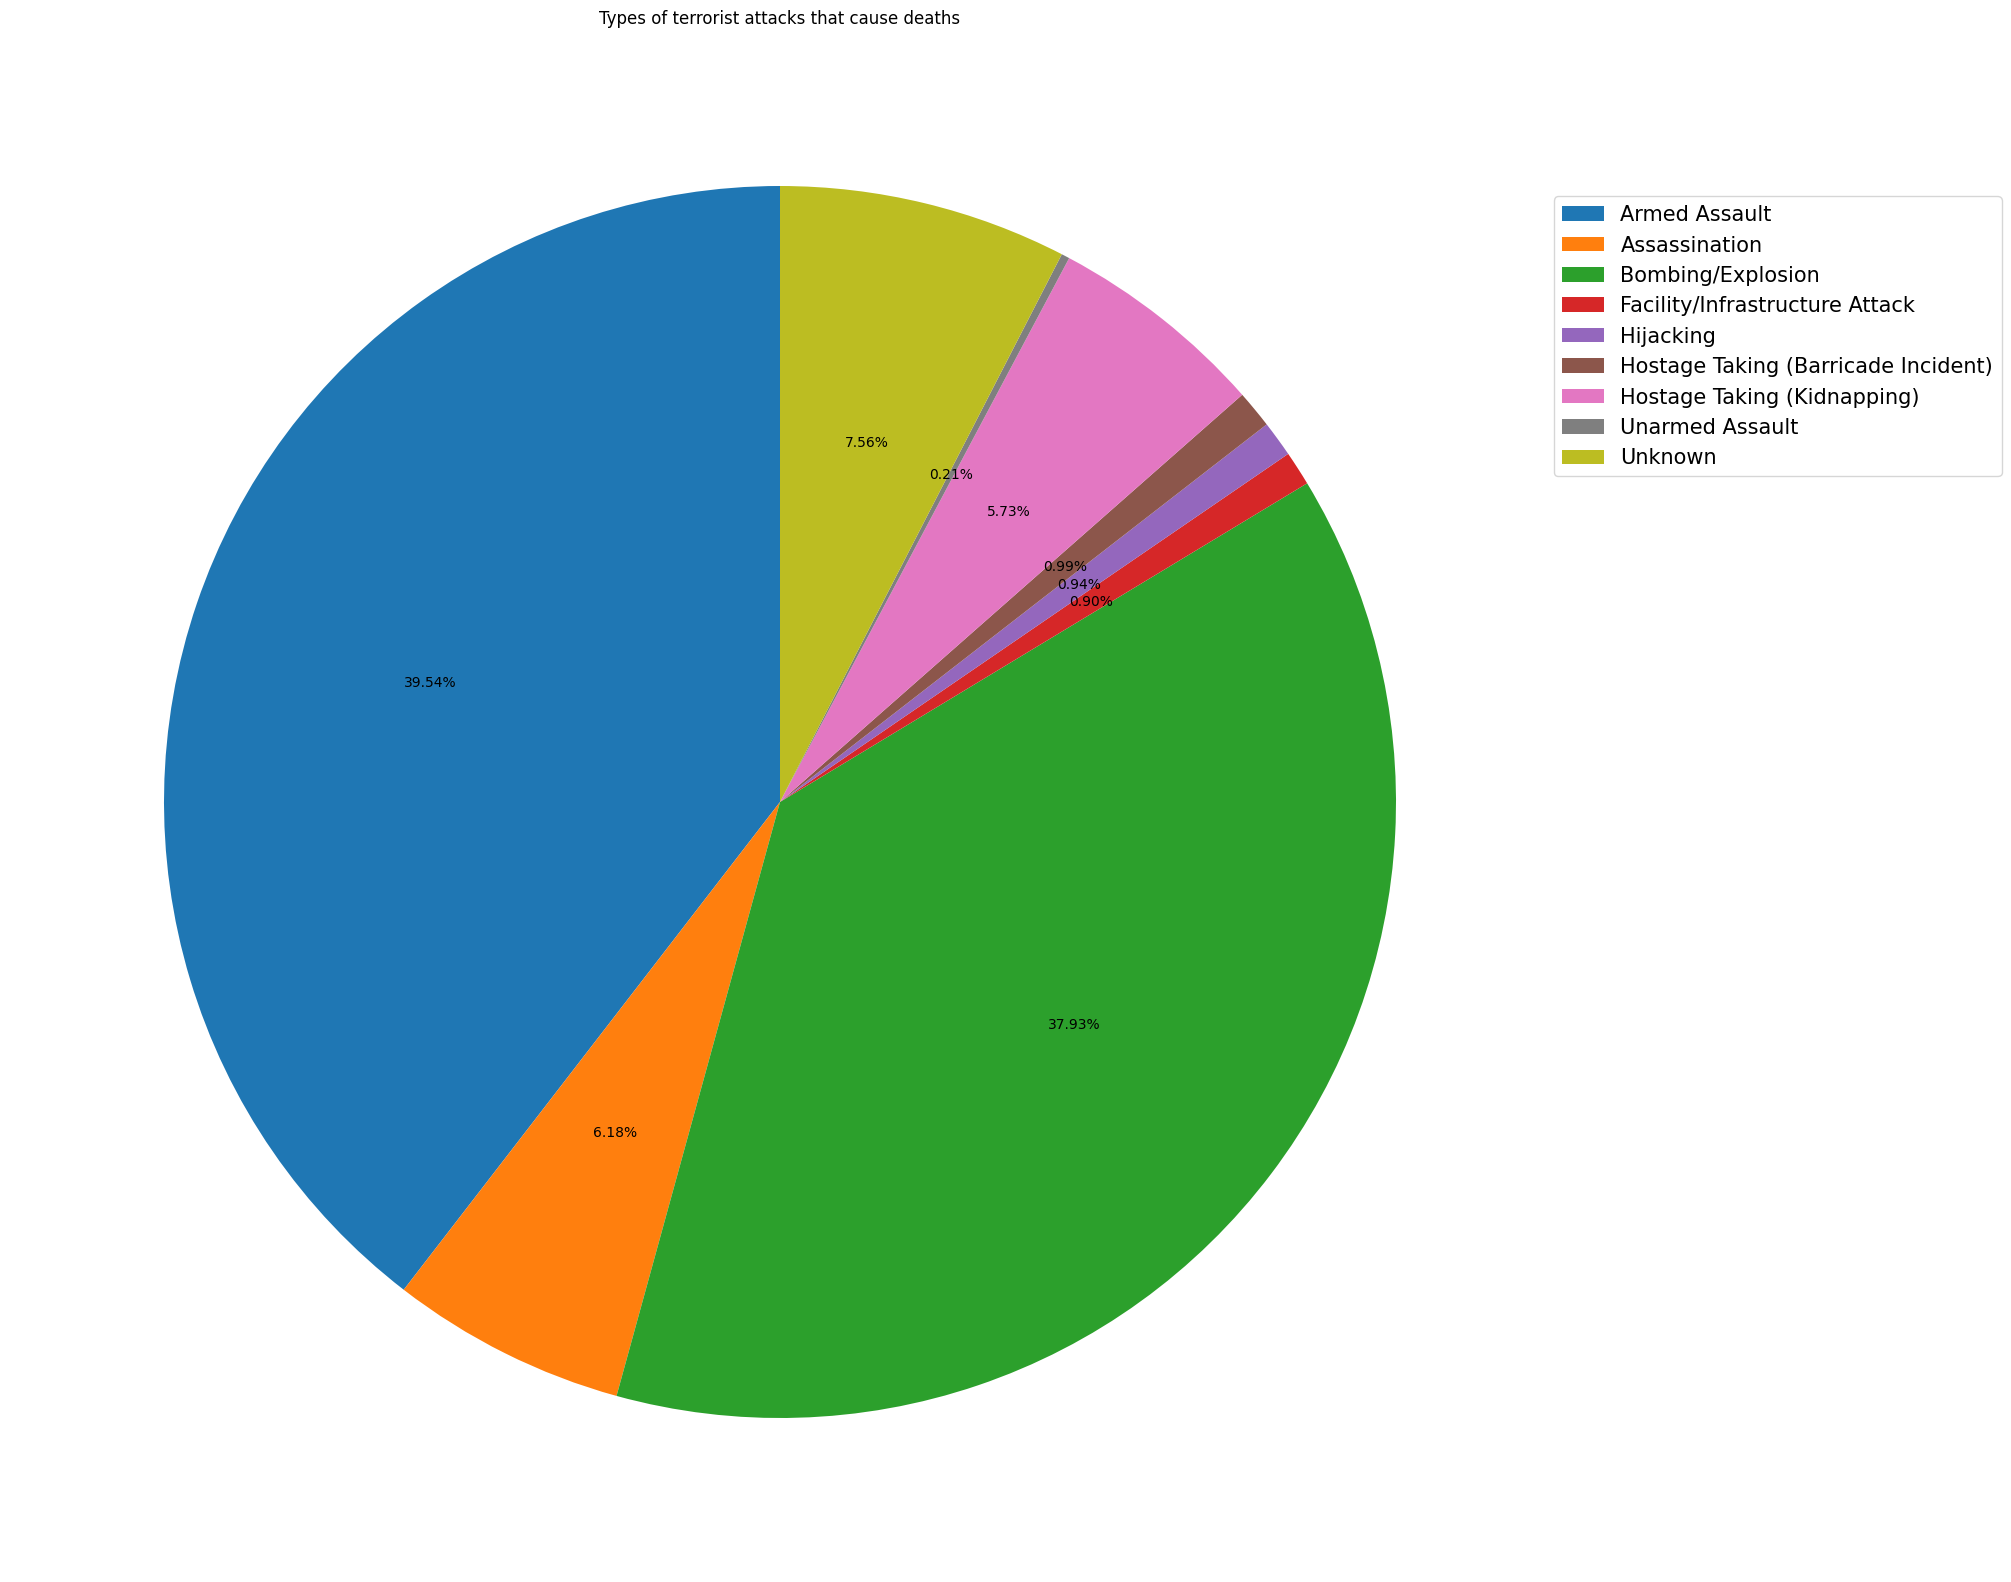

In [ ]:
import numpy as np

labels = typeKillFormatData.columns.tolist() # convert line to list
transpoze = typeKillFormatData.T # transpoze

# Assuming values is a 2D array
values = transpoze.values.tolist()
values = np.array(values).flatten()  # Flatten the 2D array to make it 1D

fig, ax = plt.subplots(figsize=(20, 20), subplot_kw=dict(aspect="equal"))
plt.pie(values, startangle=90, autopct='%.2f%%')
plt.title('Types of terrorist attacks that cause deaths')
plt.legend(labels, loc='upper right', bbox_to_anchor=(1.3, 0.9), fontsize=15)  # location legend
plt.show()

The combination of armed assaults and bombings/explosions accounts for a significant portion, specifically 77%, of the fatalities resulting from these attacks. This high fatality rate underscores the recurring use of these tactics in terrorist activities, highlighting the profound threat posed by weapons and explosives on a global scale.

##Number of People Killed in Terrorist Attacks (By Countries)

In [ ]:
#Number of Killed in Terrorist Attacks by Countries
countryData = df.loc[:,'Country']
# countyData
countryKillData = pd.concat([countryData, killData], axis=1)

In [ ]:
countryKillFormatData = countryKillData.pivot_table(columns='Country', values='Killed', aggfunc='sum')
countryKillFormatData

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Vietnam,Wallis and Futuna,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yemen,Yugoslavia,Zaire,Zambia,Zimbabwe
Killed,34482,42,11056,0,3040,0,490,37,20,28,...,1,0,1467,97,1,8269,119,324,70,154


In [ ]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size

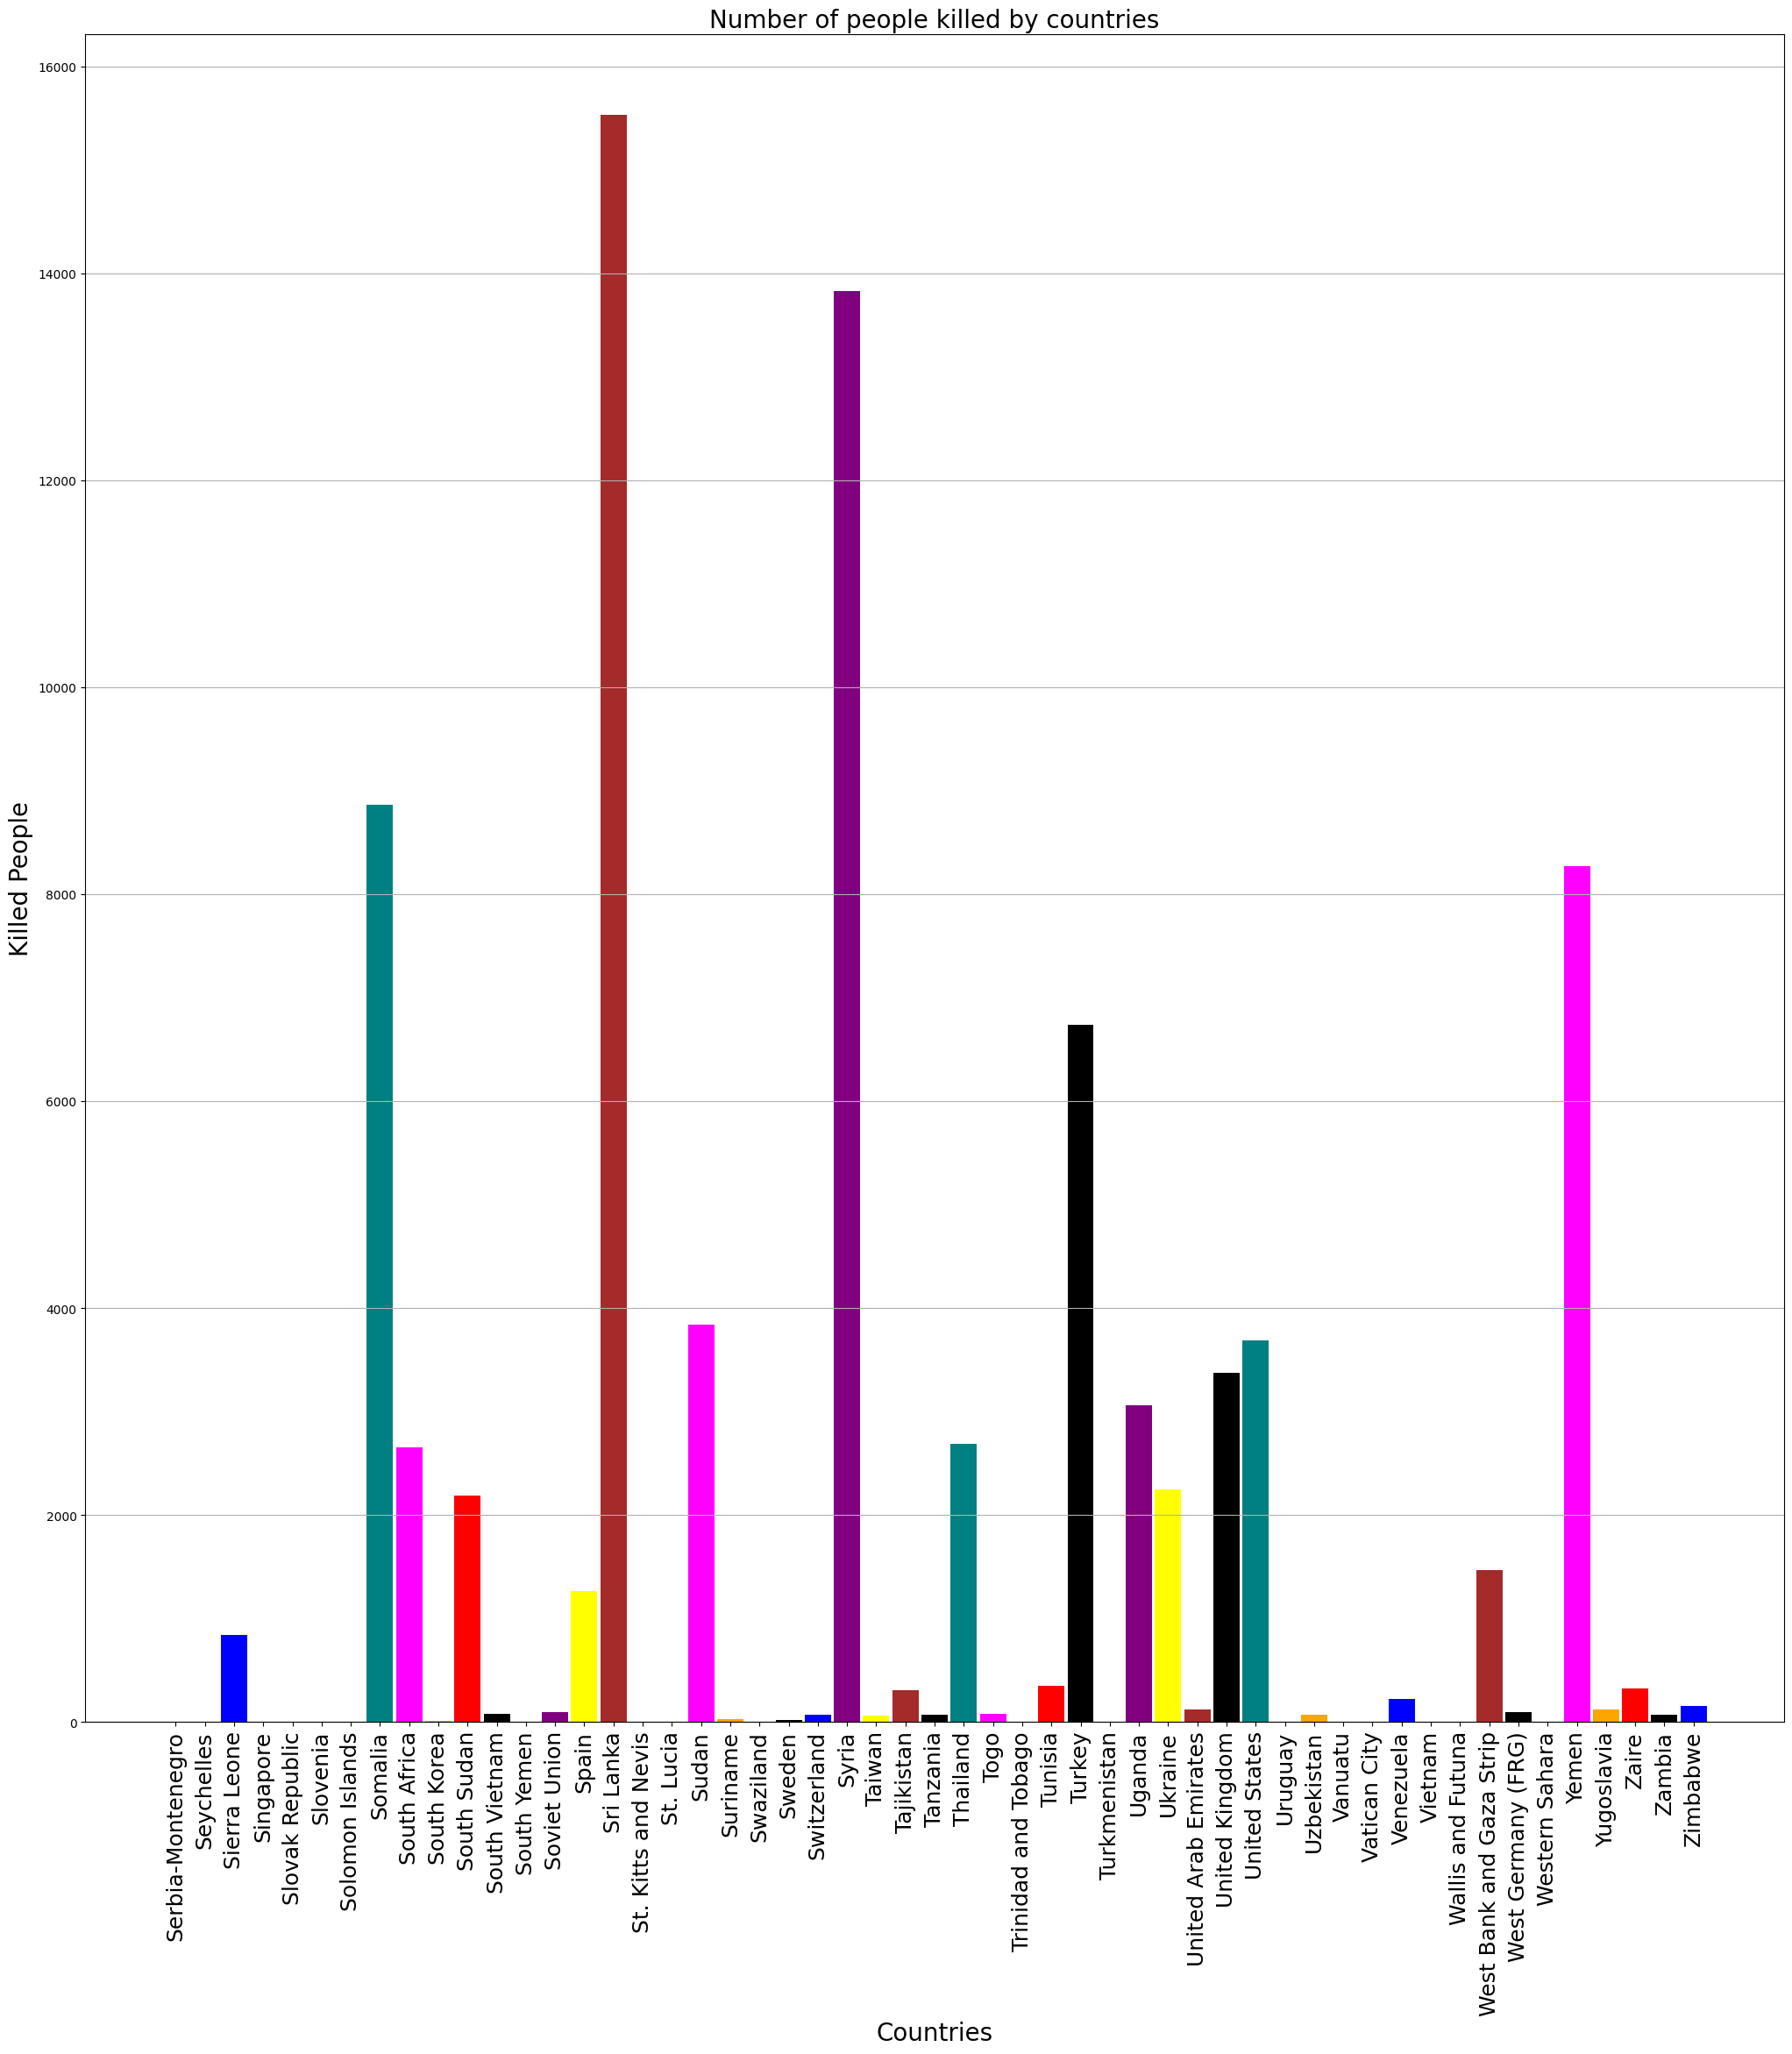

In [ ]:
labels = countryKillFormatData.columns.tolist()
labels = labels[152:206]
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[152:206]
values = [int(i[0]) for i in values]
colors = ['red', 'black', 'blue', 'purple', 'yellow', 'brown', 'black', 'teal', 'magenta', 'orange']
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=20)
plt.xlabel('Countries', fontsize = 20)
plt.xticks(index, labels, fontsize=18, rotation=90)
plt.title('Number of people killed by countries', fontsize = 20)
plt.show()

##Region Wise Casuality

In [ ]:
c1=df[["Region","Wounded"]].groupby("Region").sum().sort_values(by="Wounded",ascending=False)
c1

,Wounded
Region,
Middle East & North Africa,209002
South Asia,134718
Sub-Saharan Africa,49408
Southeast Asia,25450
North America,20600
Western Europe,17918
South America,16603
Eastern Europe,11958
East Asia,9147


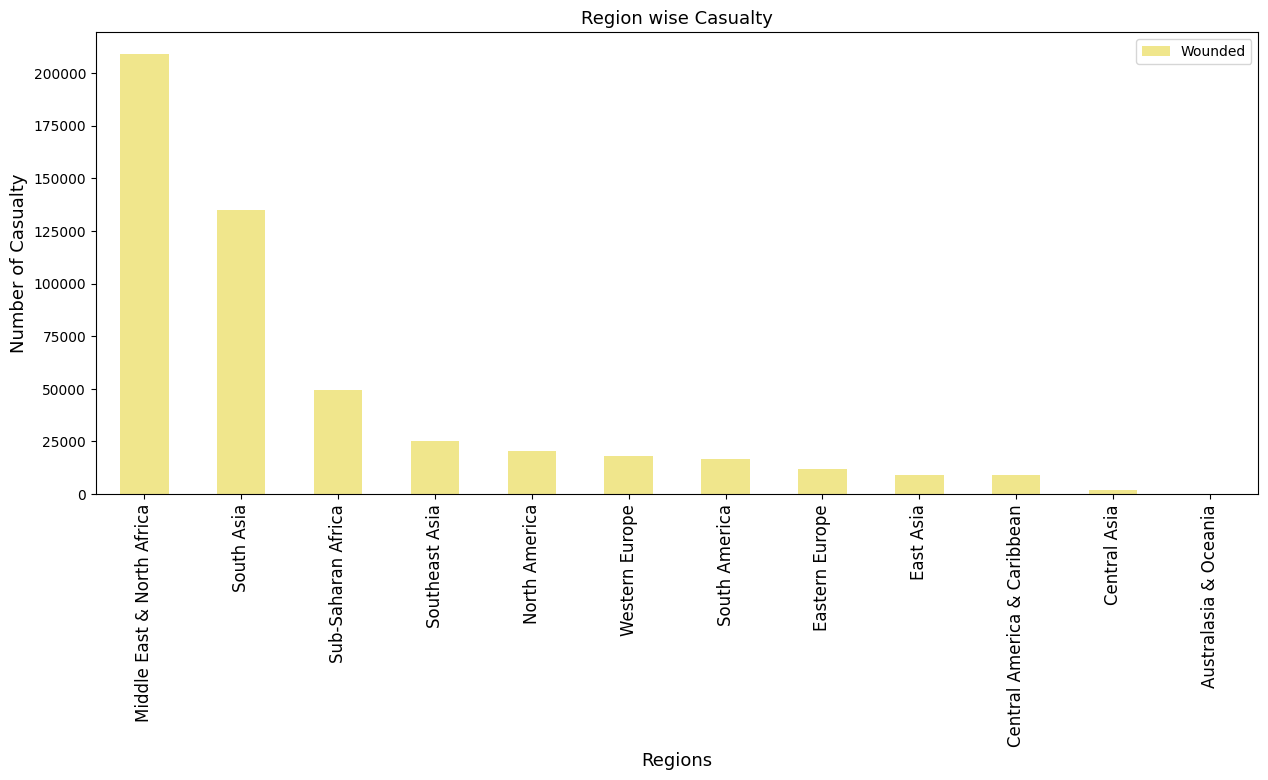

In [ ]:
c1.plot(kind="bar",color="khaki",figsize=(15,6))
plt.title("Region wise Casualty",fontsize=13)
plt.xlabel("Regions",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualty",fontsize=13)
plt.show()

##People Killed and Wounded In Each Region

In [ ]:
k1=df[["Region","Killed"]].groupby("Region").sum().sort_values(by="Killed",ascending=False)
k1

,Killed
Region,
Middle East & North Africa,130623
South Asia,95410
Sub-Saharan Africa,73462
South America,28775
Central America & Caribbean,28706
Southeast Asia,15028
Eastern Europe,7377
Western Europe,6624
North America,4813


In [ ]:
w2=df[["Region","Wounded"]].groupby("Region").sum().sort_values(by="Wounded",ascending=False)
w2

,Wounded
Region,
Middle East & North Africa,209002
South Asia,134718
Sub-Saharan Africa,49408
Southeast Asia,25450
North America,20600
Western Europe,17918
South America,16603
Eastern Europe,11958
East Asia,9147


<function matplotlib.pyplot.show(close=None, block=None)>

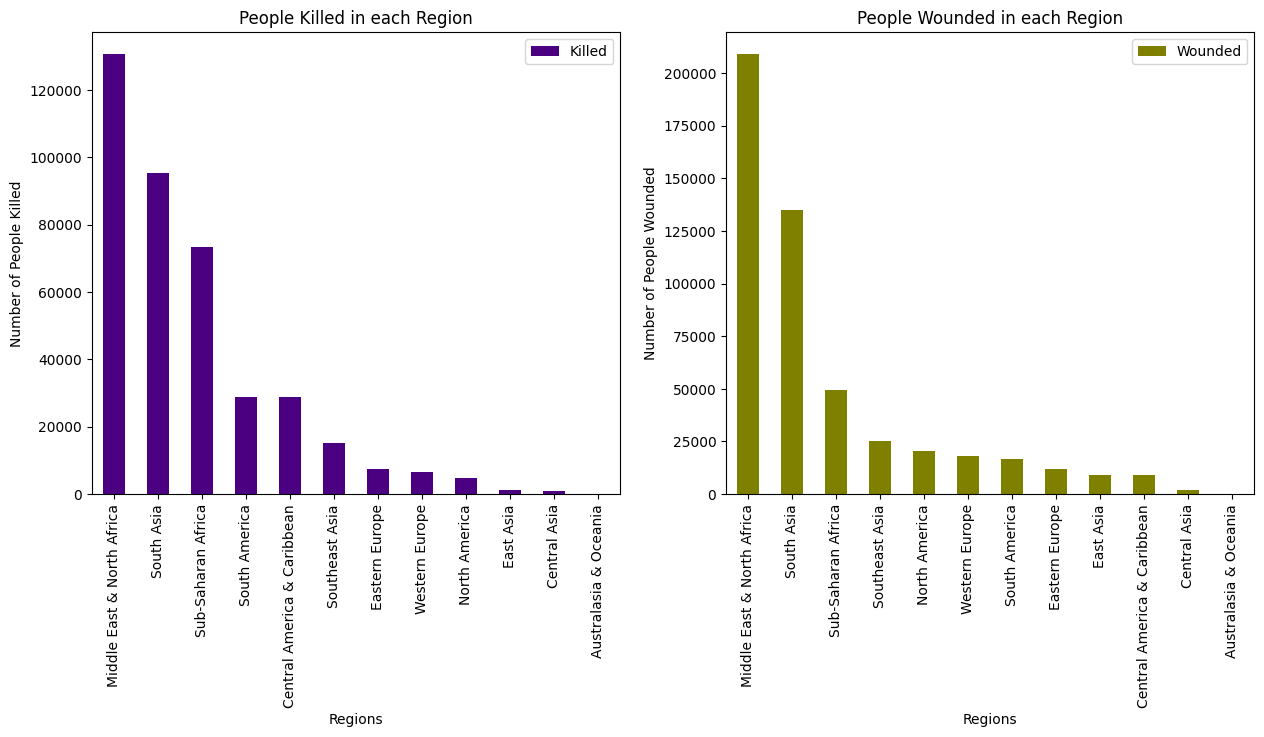

In [ ]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#People Killed
k1.plot(kind="bar",color="indigo",figsize=(15,6),ax=ax0)
ax0.set_title("People Killed in each Region")
ax0.set_xlabel("Regions")
ax0.set_ylabel("Number of People Killed")

#People Wounded
w2.plot(kind="bar",color="olive",figsize=(15,6),ax=ax1)
ax1.set_title("People Wounded in each Region")
ax1.set_xlabel("Regions")
ax1.set_ylabel("Number of People Wounded")

plt.show

##Conclusion
The Middle East and Northern Africa region have witnessed numerous severe and deadly terrorist incidents, with Iraq, Afghanistan, and Pakistan being among the most affected countries. It's essential to dispel the misconception associating Islam with terrorism, as these attacks predominantly victimize Muslims. These predominantly Muslim nations often bear the brunt of these acts of terrorism, emphasizing that Muslims are, in fact, the primary victims in this context.